In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2
import cv2


def amplitude(z):
    return np.abs(z)

def phase(z):
    return np.angle(z)




def gerchberg_saxton(target, iterations):
    A = ifft2(target)
    height,width =target.shape
    source = np.random.rand(height, width) + 1j * np.random.rand(height,width )
    source /= np.abs(source)
    for i in range(iterations):
        B = amplitude(source) * np.exp(1j * phase(A))
        C = fft2(B)
        D = amplitude(target) * np.exp(1j * phase(C))
        A = ifft2(D)

    retrieved_phase = phase(A)
    return retrieved_phase


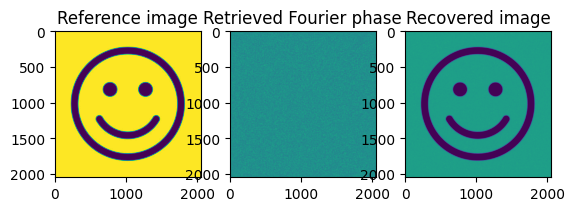

In [2]:
#filename = 'images.jpg'
image = 'smile2.jpg'
img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
img = img.astype(float) 

# --- Maximum number of iterations
iter = 30

retrievedPhase = gerchberg_saxton(img, iter)

recoveredImage = ifft2(np.exp(-1j*retrievedPhase))
plt.figure(1)

# --- Reference image
plt.subplot(131)
plt.imshow(img)
plt.title('Reference image')

# --- Retrieved Fourier phase
plt.subplot(132)
plt.imshow(retrievedPhase)
plt.title('Retrieved Fourier phase')

plt.subplot(133)

plt.imshow(np.absolute(recoveredImage)**2)
plt.title('Recovered image')

plt.show()

1.241147540135032


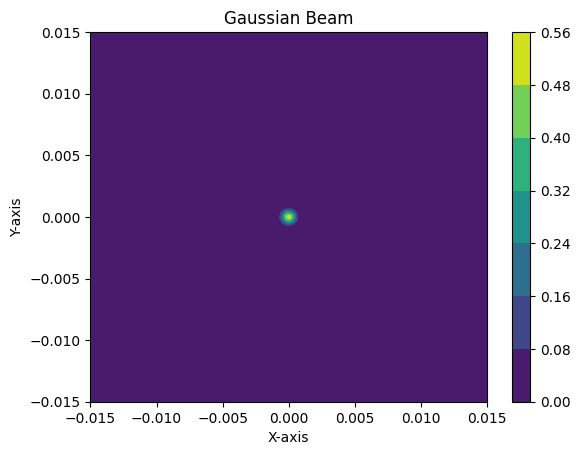

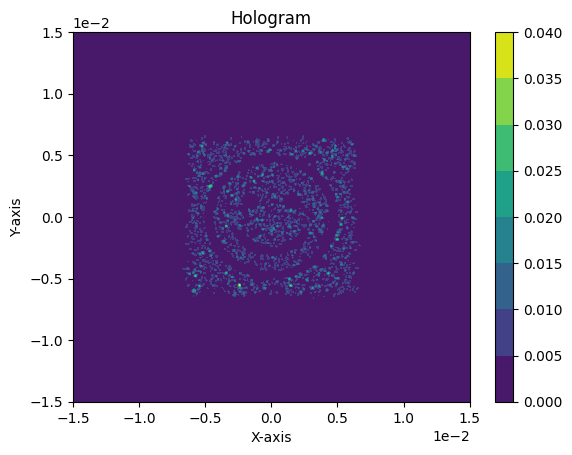

In [3]:
from scipy.fft import *
# Define one-dimensional arrays
Ny,Nx=img.shape
Lx=0.03
Ly=0.03
x = np.linspace(-Lx/2, Lx/2, Nx)  # 101 points from -5 to 5
y = np.linspace(-Ly/2, Ly/2, Ny)


wavelength = 0.6328e-6  
k = 2 * np.pi / wavelength
w0 = 5e-4
X, Y = np.meshgrid(x, y)
A=1
z0=np.pi*w0**2/wavelength
z=z0     
print(z0)

E0 = A * np.exp(-(X**2 + Y**2) / w0**2)



#########################################
fE0=fft2(E0)

fx = 2*np.pi*fftfreq(Nx, d=Lx/Nx)
fy = 2*np.pi*fftfreq(Ny, d=Ly/Ny)
Fx, Fy = np.meshgrid(fx, fy)

distprop = np.exp(-1j * k * z * np.sqrt(1 - (wavelength**2 * Fx**2 + wavelength**2 * Fy**2) / (4 * np.pi**2)))


fE0d=distprop*fE0
E0d=ifft2(fE0d)

#####################################
#slm
slm=np.exp(1j*retrievedPhase)

E0dslm=E0d*slm

##########################################
#LENTE

f=0.3
tlente=np.exp(1j*k/(2*f)*(X**2+Y**2))
E0lente=E0dslm*tlente

plt.contourf(X,Y, np.abs(E0lente)**2, cmap='viridis')
plt.colorbar()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Gaussian Beam')
plt.show()
################################################
#IR PARA O FOCO

fE0lente=fftshift(fft2(E0lente))

fxl = 2*np.pi*fftfreq(Nx, d=Lx/Nx)
fyl = 2*np.pi*fftfreq(Ny, d=Ly/Ny)
Fxl, Fyl = np.meshgrid(fxl, fyl)

def distproplente(d,k,wavelength,Fx,Fy):
    return np.exp(-1j * k * d * np.sqrt(1 - (wavelength**2 * Fx**2 + wavelength**2 * Fy**2) / (4 * np.pi**2)))


fE0dlentef=distproplente(f,k,wavelength,Fxl,Fyl)*fE0lente



E0dlentef=ifft2(fE0dlentef)


plt.contourf(X, Y, np.abs(E0dlentef)**2, cmap='viridis')
plt.colorbar()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#plt.xlim(-0.01, 0.01)
#plt.ylim(-0.01, 0.01)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Hologram')
plt.show()


